In [1]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import repeat


In [2]:
df = pd.read_excel('/home/srishti/Downloads/Online Retail.xlsx')


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration']
        str = pd.concat([types, counts, distincts, nulls, missing_ration], axis = 1, sort=True)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=True)
        corr_col = 'corr '+ pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    return str

details = rstr(df)
display(details.sort_values(by='missing ration', ascending=False))


,types,counts,distincts,nulls,missing ration
Country,object,397884,37,0,0.0
CustomerID,float64,397884,4338,0,0.0
Description,object,397884,3877,0,0.0
InvoiceDate,datetime64[ns],397884,17282,0,0.0
InvoiceNo,object,397884,18532,0,0.0
Quantity,int64,397884,301,0,0.0
StockCode,object,397884,3665,0,0.0
UnitPrice,float64,397884,440,0,0.0


In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [15]:
details = rstr(df)
display(details.sort_values(by='distincts', ascending=False))

,types,counts,distincts,nulls,missing ration
InvoiceNo,object,397884,18532,0,0.0
InvoiceDate,datetime64[ns],397884,17282,0,0.0
CustomerID,Int64,397884,4338,0,0.0
Description,object,397884,3877,0,0.0
StockCode,object,397884,3665,0,0.0
amount,float64,397884,2939,0,0.0
UnitPrice,float64,397884,440,0,0.0
Quantity,int64,397884,301,0,0.0
Country,object,397884,37,0,0.0


# Problems with the Dataset
1. Entries with Negative Quantity
2. Entries with Negative Unit Price
3. Missing Customer Values

In [ ]:
df = df[~(df.Quantity<0)]
df = df[df.UnitPrice>0]
df = df[~(df.CustomerID.isnull())]


## Changing Data Types and Adding Column 'Amount'

In [22]:
df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df = df.drop(['amount'], axis = 1)
df['Amount'] = df.Quantity*df.UnitPrice
df.CustomerID = df.CustomerID.astype('Int64')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


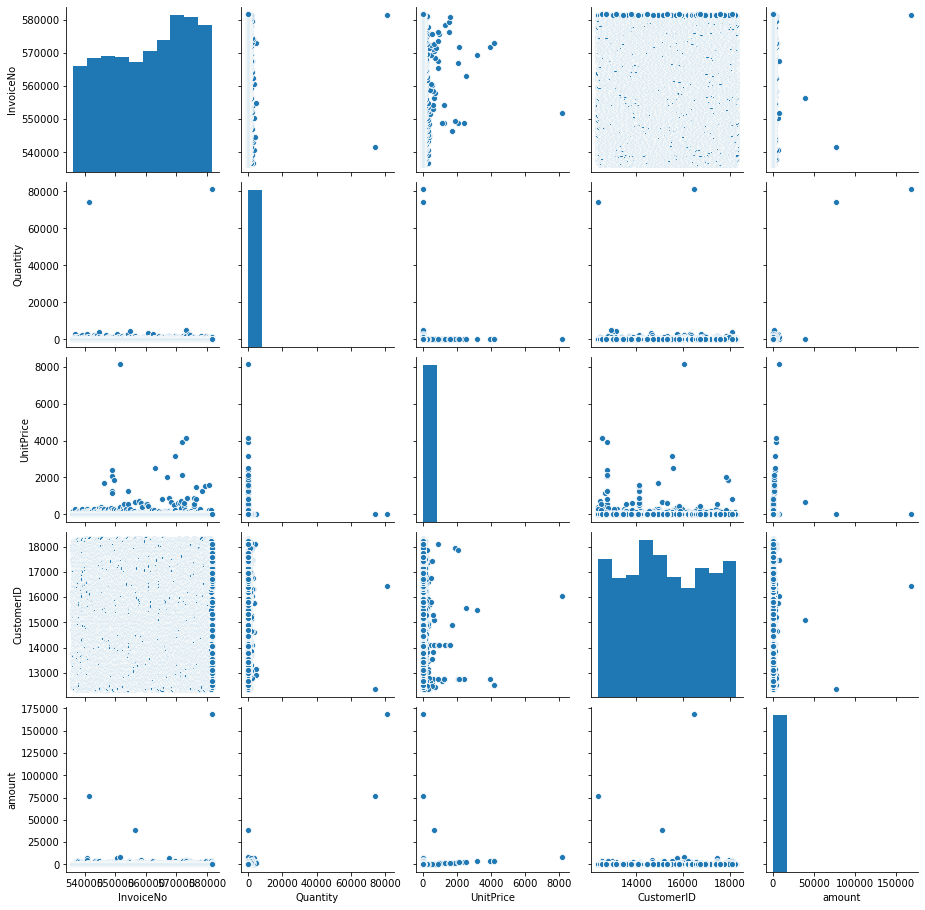

In [14]:
sns.pairplot(df)

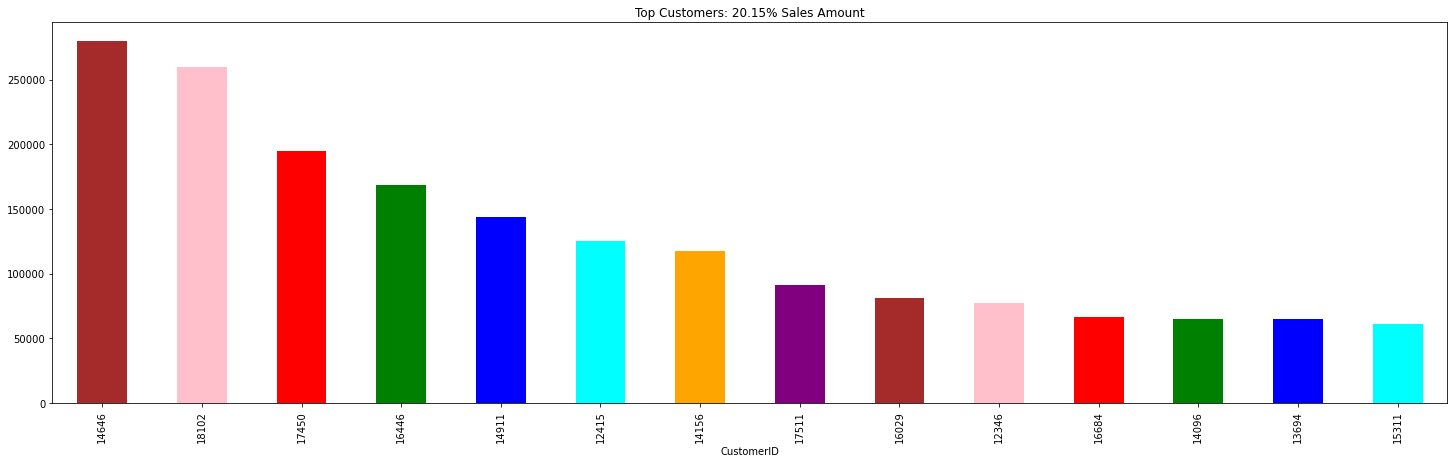

In [26]:
fig = plt.figure(figsize=(25, 7))
PercentSales =  np.round((df.groupby(["CustomerID"]).Amount.sum().\
                          sort_values(ascending = False)[:14].sum()/df.groupby(["CustomerID"]).\
                          Amount.sum().sort_values(ascending = False).sum()) * 100, 2)
my_colors = ['brown','pink', 'red', 'green', 'blue', 'cyan','orange','purple']
g = df.groupby(["CustomerID"]).Amount.sum().sort_values(ascending = False)[:14].\
    plot(kind='bar',color=my_colors, title='Top Customers: {:3.2f}% Sales Amount'.format(PercentSales))


# RFM Analysis

In [27]:
from datetime import date
today = date.today()
print(today)

2021-05-20


In [30]:
df_copy = df

In [33]:
df_copy['Recency'] = list(map(lambda x: (today - x.date()).days,df['InvoiceDate']))
df_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,3823
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,3823
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,3823
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,3823
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,3823


In [34]:
df_copy = df
df_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
df_copy['Frequency']= df_copy.groupby(by=['CustomerID'], as_index = False)['InvoiceNo'].count()['InvoiceNo']
df_copy.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Recency,Frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,3823,1.0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,3823,1.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,3823,3.0
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047,United Kingdom,25.50,3823,2.0
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047,United Kingdom,17.85,3823,2.0
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583,France,90.00,3823,2.0
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00,3823,1.0
47,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850,United Kingdom,11.10,3823,2.0
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850,United Kingdom,15.30,3823,5.0
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100,United Kingdom,350.40,3823,3.0


In [42]:
customer_freq = (df[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).\
                groupby(["CustomerID"]).count().reset_index()
customer_freq.rename(columns={'InvoiceNo':'Frequency'},inplace=True)
print(customer_freq)

# customer_history_df = customer_history_df.merge(customer_freq)

      CustomerID  Frequency
0          12346          1
1          12347          7
2          12348          4
3          12349          1
4          12350          1
...          ...        ...
4333       18280          1
4334       18281          1
4335       18282          2
4336       18283         16
4337       18287          3

[4338 rows x 2 columns]


In [64]:
monetary_value = df_copy.groupby(by = "CustomerID",as_index = False).agg({'Amount': 'sum'})
rfm = pd.merge(customer_freq, monetary_value, on='CustomerID')
rfm = pd.merge(df_copy[['CustomerID','Recency']],rfm, on = 'CustomerID')
rfm.drop_duplicates(subset=['CustomerID'], keep="first", inplace=True)
rfm.reset_index(drop = True, inplace = True)
rfm.rename(columns = {'Amount':'Monetary'}, inplace = True)
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,17850,3823,34,503.28
1,13047,3823,10,203.53
2,12583,3823,15,617.80
3,13748,3823,5,255.41
4,15100,3823,3,876.00


In [65]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles


,CustomerID,Recency,Frequency,Monetary
0.25,13813.25,3562.0,1.0,17.7000
0.50,15299.5,3698.0,2.0,47.0500
0.75,16778.75,3776.0,5.0,130.1025


In [66]:
def RScore(x):
    if x <= quantiles['Recency'][0.25]:
        return 4
    elif x <= quantiles['Recency'][0.5]:
        return 3
    elif x <= +quantiles['Recency'][0.75]: 
        return 2

    else:
        return 1

def FMScore(x,col):
    if x <= quantiles[col][0.25]:
        return 1
    elif x <= quantiles[col][0.5]:
        return 2
    elif x <= quantiles[col][0.75]: 
        return 3
    else:
        return 4
rfm['R_Score'] = list(map(RScore,rfm['Recency']))
rfm['F_Score'] = list(map(FMScore,rfm['Frequency'],repeat('Frequency')))
rfm['M_Score'] = list(map(FMScore,rfm['Monetary'],repeat('Monetary')))
rfm.head()


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,17850,3823,34,503.28,1,4,4
1,13047,3823,10,203.53,1,4,4
2,12583,3823,15,617.80,1,4,4
3,13748,3823,5,255.41,1,3,4
4,15100,3823,3,876.00,1,3,4


In [67]:
rfm_scores = rfm.iloc[:,4:]
rfm_scores

,R_Score,F_Score,M_Score
0,1,4,4
1,1,4,4
2,1,4,4
3,1,3,4
4,1,3,4
...,...,...,...
4333,4,1,1
4334,4,1,1
4335,4,1,3
4336,4,1,1


In [68]:
import pickle
pickle_out = open("/home/srishti/PycharmProjects/Ecom for MP/rfm_scores.pickle",'wb')
pickle.dump(quantiles, pickle_out)
pickle_out.close()


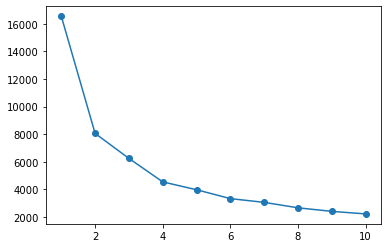

In [69]:
sumofsquares = []
for i in range(1,11):
    km = KMeans(n_clusters = i, random_state = 1231).fit(rfm_scores)
    sumofsquares.append(km.inertia_)
plt.plot(range(1,11),sumofsquares,marker = 'o')
plt.show()

[[1.61279461 1.74747475 1.79124579]
 [1.40420372 3.60145513 3.59013743]
 [3.60159652 1.28301887 1.52104499]
 [3.26081731 2.74639423 3.24519231]]


Text(0.5, 0, 'Monetary')

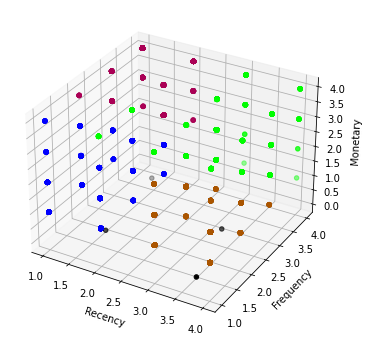

In [70]:
#optimal k=4
from mpl_toolkits.mplot3d import Axes3D
model = KMeans(n_clusters = 4, random_state = 1231).fit(rfm_scores)
centers = model.cluster_centers_
print(centers)
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(rfm_scores.iloc[:,0],rfm_scores.iloc[:,1],rfm_scores.iloc[:,2],cmap = "brg",
          c = model.predict(rfm_scores.iloc[:,0:]))
ax.scatter(centers[:,0],centers[:,1],c = 'black')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')


In [61]:
with open('/home/srishti/PycharmProjects/Ecom for MP/new_model.pickle', 'wb') as f: 
    pickle.dump(model, f)

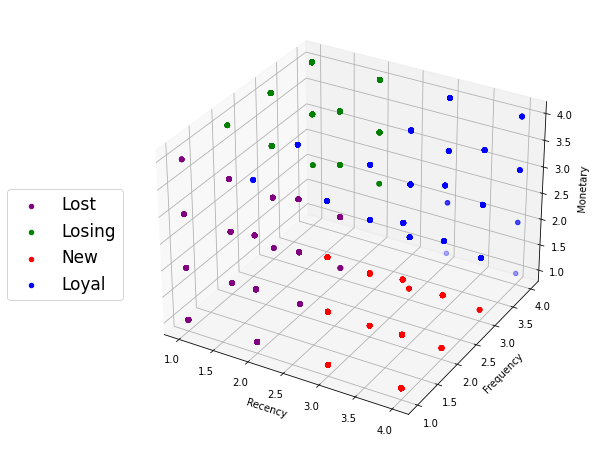

In [71]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')
a1 = ax.scatter(rfm_scores.iloc[:,0][x==0],rfm_scores.iloc[:,1][x==0],rfm_scores.iloc[:,2][x==0],color = "purple")
a2 = ax.scatter(rfm_scores.iloc[:,0][x==1],rfm_scores.iloc[:,1][x==1],rfm_scores.iloc[:,2][x==1],color = "green")
a3 = ax.scatter(rfm_scores.iloc[:,0][x==2],rfm_scores.iloc[:,1][x==2],rfm_scores.iloc[:,2][x==2],color = "red")
a4 = ax.scatter(rfm_scores.iloc[:,0][x==3],rfm_scores.iloc[:,1][x==3],rfm_scores.iloc[:,2][x==3],color = "blue")
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend([a1,a2,a3,a4],['Lost','Losing','New','Loyal'], loc = 'best',bbox_to_anchor=(0, 0.6), prop={'size':17})
#CLuster 0: Recency: Low, Frequency: Low to high,Monetary: Low to med ----Lost 
#CLuster 1: Recency: Low, Frequency: Med to high,Monetary: Med to high ----Losing
#CLuster 2: Recency: Med to high, Frequency: Low to med,Monetary: Low -----New
#CLuster 3: Recency: Med to high, Frequency: high,Monetary: Low to high  -----Loyal


In [72]:
with open('/home/srishti/PycharmProjects/Ecom for MP/clusters_3d.pickle', 'wb') as f: 
    pickle.dump(fig, f)